<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Base/AI_HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

**Максимальная оценка за дз**
> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Your answer here`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.55 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


**Бонус**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [4]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [5]:
df_train.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0
6998,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [6]:
print(f"В данных имеется {df_train.isna().sum().sum()} пропусков")
print(f"Пропущенные значения наблюдаются в {df_train.columns[df_train.isna().any()].to_list()} столбцах")

В данных имеется 1005 пропусков
Пропущенные значения наблюдаются в ['mileage', 'engine', 'max_power', 'torque', 'seats'] столбцах


Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [7]:
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = [np.nan if str(value).split(' ')[0] == '' else str(value).split(' ')[0] for value in df_train[col]]
    df_train[col] = df_train[col].astype(float)
    df_test[col] = [np.nan if str(value).split(' ')[0] == '' else str(value).split(' ')[0] for value in df_test[col]]
    df_test[col] = df_test[col].astype(float)
df_train.fillna(df_train.select_dtypes([int, float]).median(), inplace=True)
df_test.fillna(df_train.select_dtypes([int, float]).median(), inplace=True)

print(f"В данных имеется {df_train.drop(['torque', 'seats'], axis=1).isna().sum().sum()} пропусков")

В данных имеется 0 пропусков


In [8]:
# Проверка на явные дубликаты
duplicates_count = df_train.duplicated().sum()
if duplicates_count > 0:
    print(f"В данных обнаружено {duplicates_count} явных дубликатов.")
else:
    print("Явных дубликатов в данных нет.")

В данных обнаружено 985 явных дубликатов.


In [9]:
import numpy as np
print(np.__version__)

2.0.0


In [30]:
from ydata_profiling import ProfileReport

# Создание отчета профилирования данных
profile = ProfileReport(df_train, title="Pandas Profiling Report for Train Data", explorative=True)

# Сохранение отчета в HTML
profile.to_file("train_data_profile_report.html")

print("Отчет сохранен в 'train_data_profile_report.html'")

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 55.55it/s]

Отчет сохранен в 'train_data_profile_report.html'


### **Задание 2 (0.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [10]:
from IPython.display import display
from tabulate import tabulate


# 1. Проверка на наличие строк с одинаковым признаковым описанием (без учета целевой переменной 'selling_price')
target_column = 'selling_price'
feature_columns = df_train.columns.difference([target_column])  # Исключаем целевую переменную
duplicate_mask = df_train.duplicated(subset=feature_columns, keep=False)
print("1. Проверка на наличие строк с одинаковым признаковым описанием (без учета целевой переменной):")
duplicates_count = duplicate_mask.sum()
if duplicates_count > 0:
    print(f"В данных обнаружено {duplicates_count} строк с одинаковым признаковым описанием (без учета целевой переменной).")
else:
    print("Повторяющихся строк (без учета целевой переменной) не обнаружено.")
print()

# 2. Количество таких строк
print("2. Количество строк с одинаковым признаковым описанием:")
print(f"Количество строк: {duplicates_count}")
print()

# 3. Отображение строк с одинаковым признаковым описанием
duplicates = df_train[duplicate_mask]
print("3. Отображение строк с одинаковым признаковым описанием:")
if not duplicates.empty:
    display(duplicates)  # Красиво отображаем повторяющиеся строки
else:
    print("Нет строк с одинаковым признаковым описанием.")
print()

# 4. Удаление дубликатов: оставляем только первую строку для каждого автомобиля с одинаковым признаковым описанием
print("4. Удаление дубликатов (оставляем первую строку при одинаковом описании):")
df_train = df_train.drop_duplicates(subset=feature_columns, keep='first')
print("Повторяющиеся строки успешно удалены.")
print(f"Новый размер данных: {df_train.shape}")
print()

# 5. Обновление индексов
print("5. Обновление индексов:")
df_train.reset_index(drop=True, inplace=True)
print("Индексы обновлены. Пример данных:")
display(df_train.head())  # отображаем первые 5 строк обновленных данных

1. Проверка на наличие строк с одинаковым признаковым описанием (без учета целевой переменной):
В данных обнаружено 1799 строк с одинаковым признаковым описанием (без учета целевой переменной).

2. Количество строк с одинаковым признаковым описанием:
Количество строк: 1799

3. Отображение строк с одинаковым признаковым описанием:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.40,1197.0,83.10,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.80,796.0,34.20,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,19.30,1248.0,82.00,NaN,5.0
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.40,1498.0,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,140Nm@ 1800-3000rpm,5.0



4. Удаление дубликатов (оставляем первую строку при одинаковом описании):
Повторяющиеся строки успешно удалены.
Новый размер данных: (5840, 13)

5. Обновление индексов:
Индексы обновлены. Пример данных:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0


Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [11]:
from IPython.display import display
from tabulate import tabulate

# Преобразование значений в строки перед использованием .str.extract()
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)
    df_test[col] = df_test[col].astype(str).str.extract(r'(\d+\.?\d*)').astype(float)

# Удаление столбца torque из обоих датасетов
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

# Проверка результатов
print("Обновленные типы данных (train):")
display(pd.DataFrame(df_train.dtypes, columns=["Тип данных"]).T)

print("Обновленные типы данных (test):")
display(pd.DataFrame(df_test.dtypes, columns=["Тип данных"]).T)

# Проверка на пропуски после обработки
print("Пропущенные значения (train):")
display(pd.DataFrame(df_train.isna().sum(), columns=["Количество пропусков"]).T)

print("Пропущенные значения (test):")
display(pd.DataFrame(df_test.isna().sum(), columns=["Количество пропусков"]).T)

# Заполнение пропусков медианой для числовых столбцов
df_train.fillna(df_train.median(numeric_only=True), inplace=True)
df_test.fillna(df_train.median(numeric_only=True), inplace=True)

# Вывод первых строк для проверки
print("Обновленный train dataset (первые 5 строк):")
display(df_train.head())

print("Обновленный test dataset (первые 5 строк):")
display(df_test.head())

Обновленные типы данных (train):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
Тип данных,object,int64,int64,int64,object,object,object,object,float64,float64,float64,float64


Обновленные типы данных (test):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
Тип данных,object,int64,int64,int64,object,object,object,object,float64,float64,float64,float64


Пропущенные значения (train):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
Количество пропусков,0,0,0,0,0,0,0,0,0,0,0,0


Пропущенные значения (test):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
Количество пропусков,0,0,0,0,0,0,0,0,0,0,0,0


Обновленный train dataset (первые 5 строк):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0


Обновленный test dataset (первые 5 строк):


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9,1799.0,130.0,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1,1498.0,98.6,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5,1172.0,65.0,5.0


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

### **Задание 5 (0.1 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [12]:
# Приведение столбцов engine и seats к int
df_train['engine'] = df_train['engine'].fillna(0).astype(int)  # Для корректного преобразования заполняем пропуски 0
df_test['engine'] = df_test['engine'].fillna(0).astype(int)

df_train['seats'] = df_train['seats'].fillna(0).astype(int)
df_test['seats'] = df_test['seats'].fillna(0).astype(int)

# Основные статистики до заполнения пропусков
print("Числовые статистики для train (до заполнения пропусков):")
display(df_train.describe(include=[float, int]))

print("Числовые статистики для test (до заполнения пропусков):")
display(df_test.describe(include=[float, int]))

# Проверка категориальных столбцов
categorical_columns_train = df_train.select_dtypes(include=['object']).columns
categorical_columns_test = df_test.select_dtypes(include=['object']).columns

if len(categorical_columns_train) > 0:
    print("Категориальные статистики для train (до заполнения пропусков):")
    display(df_train[categorical_columns_train].describe())

if len(categorical_columns_test) > 0:
    print("Категориальные статистики для test (до заполнения пропусков):")
    display(df_test[categorical_columns_test].describe())

# Заполнение пропусков медианой для числовых данных
df_train.fillna(df_train.median(numeric_only=True), inplace=True)
df_test.fillna(df_train.median(numeric_only=True), inplace=True)

# Основные статистики после заполнения пропусков
print("Числовые статистики для train (после заполнения пропусков):")
display(df_train.describe(include=[float, int]))

print("Числовые статистики для test (после заполнения пропусков):")
display(df_test.describe(include=[float, int]))

if len(categorical_columns_train) > 0:
    print("Категориальные статистики для train (после заполнения пропусков):")
    display(df_train[categorical_columns_train].describe())

if len(categorical_columns_test) > 0:
    print("Категориальные статистики для test (после заполнения пропусков):")
    display(df_test[categorical_columns_test].describe())

Числовые статистики для train (до заполнения пропусков):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Числовые статистики для test (до заполнения пропусков):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Категориальные статистики для train (до заполнения пропусков):


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Категориальные статистики для test (до заполнения пропусков):


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Числовые статистики для train (после заполнения пропусков):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910782,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639585,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


Числовые статистики для test (после заполнения пропусков):


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


Категориальные статистики для train (после заполнения пропусков):


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


Категориальные статистики для test (после заполнения пропусков):


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

1) Визуализация попарных распределений числовых признаков для train:


<Figure size 1200x800 with 0 Axes>

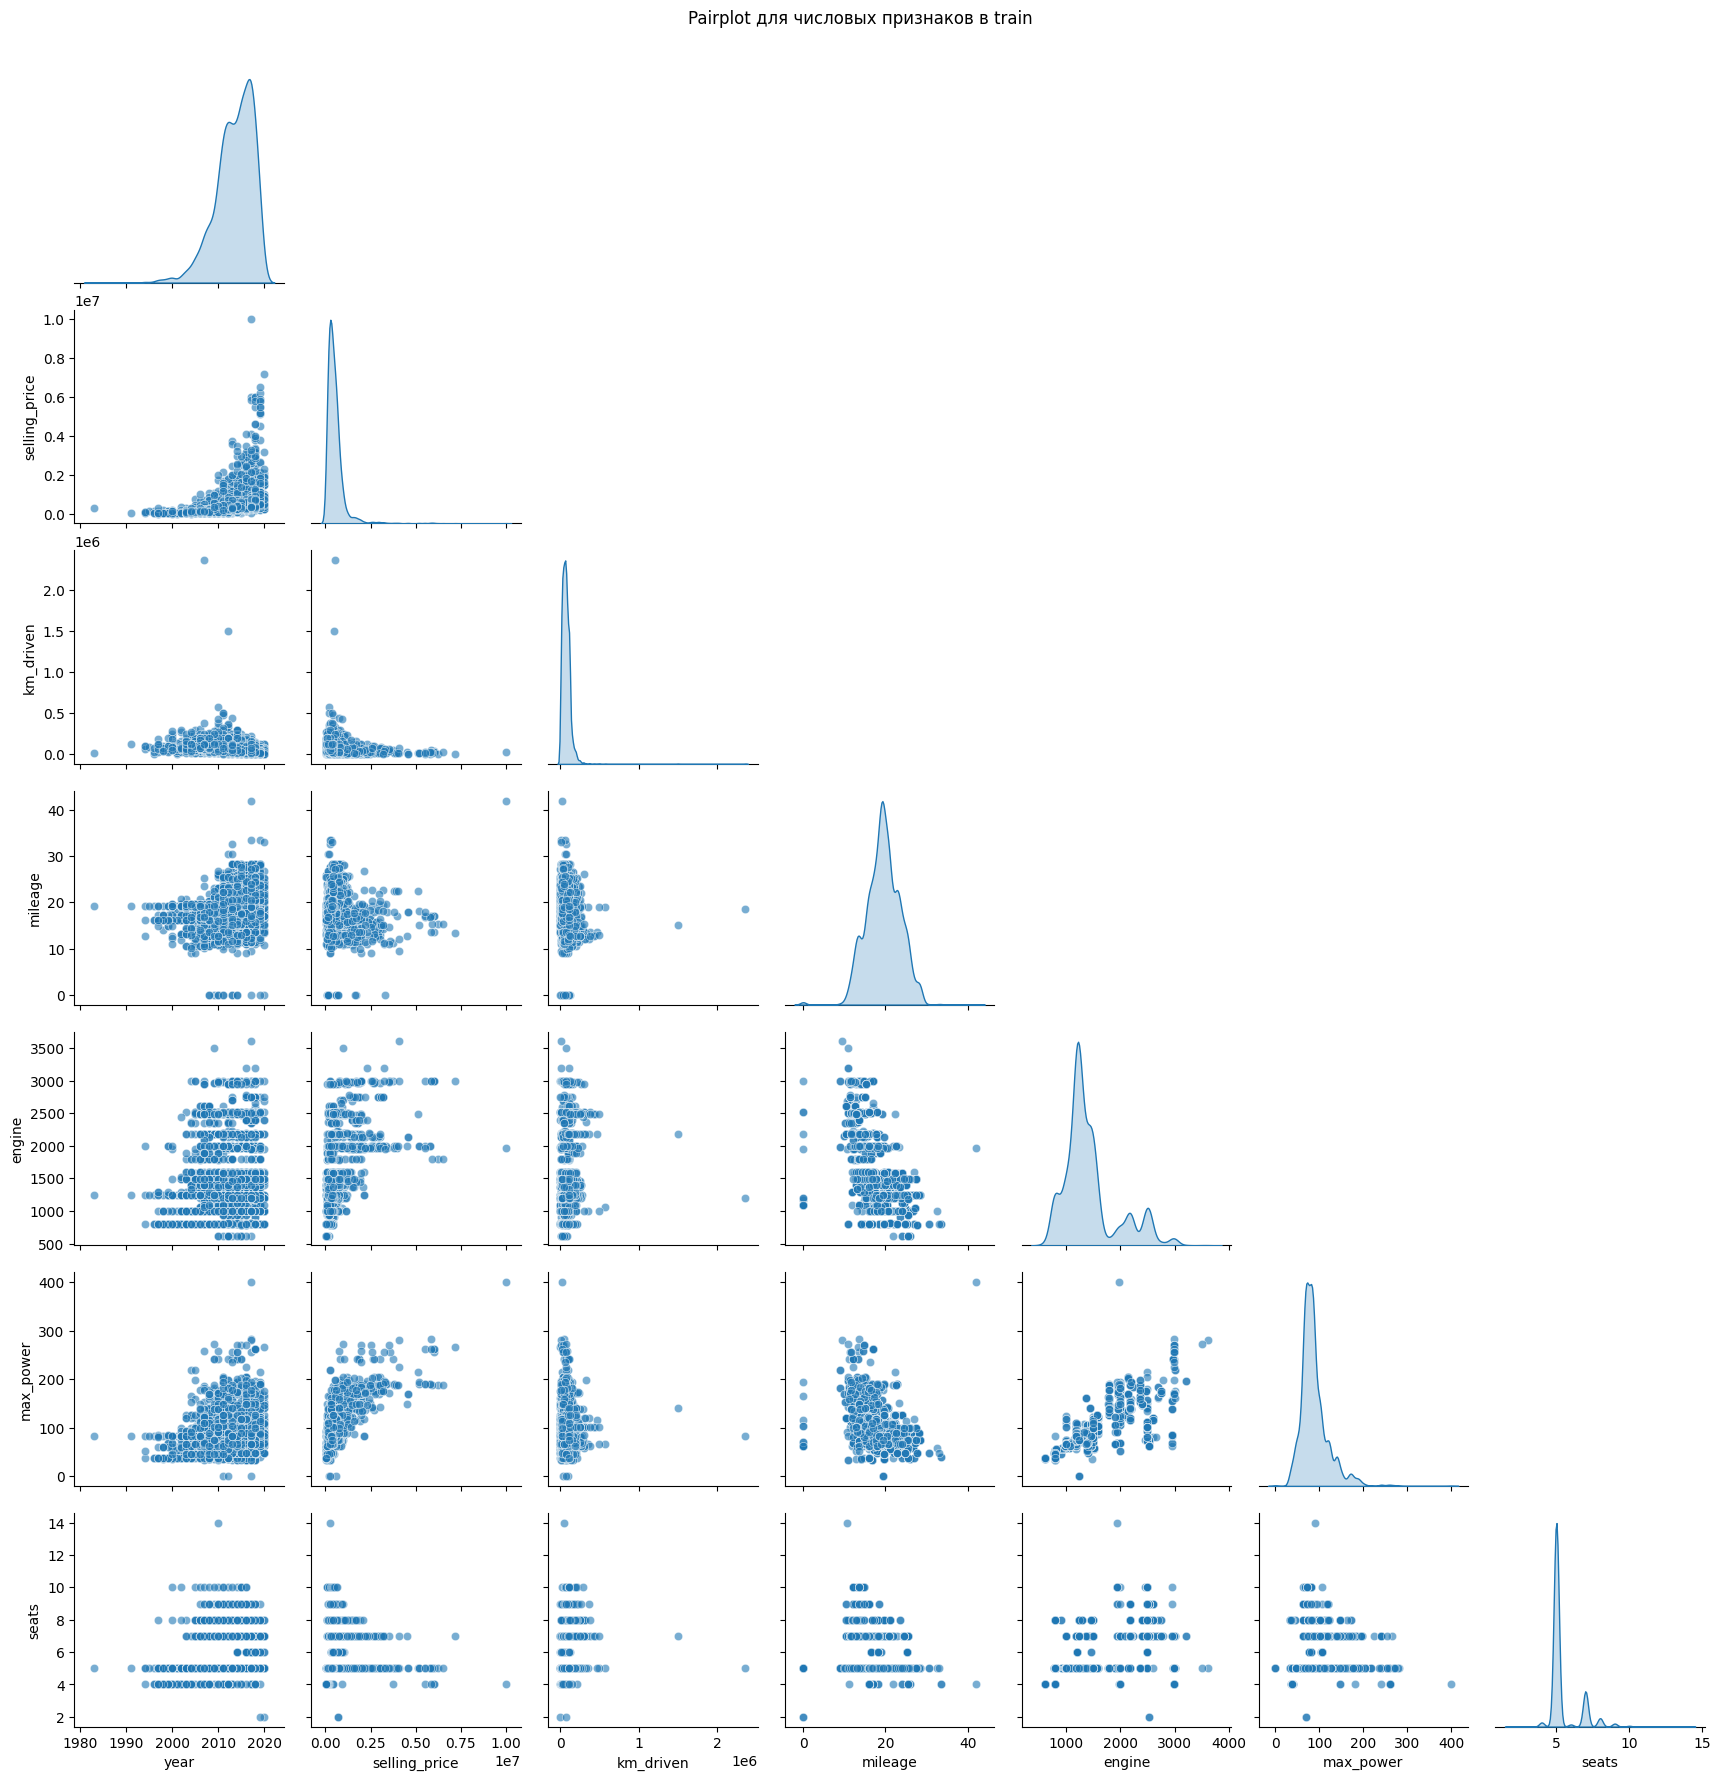

2) Ответы на вопросы по train:
- Можно предположить связь некоторых признаков с целевой переменной 'selling_price'. Например:
  * Распределение цены ('selling_price') может зависеть от мощности ('max_power') или пробега ('mileage').
  * Видны слабые линейные связи для некоторых признаков.
- На основе распределений можно предположить наличие корреляции между такими признаками, как:
  * 'engine' и 'max_power' — возможная прямая корреляция.
  * 'mileage' и другими признаками — более слабая взаимосвязь.

3) Визуализация попарных распределений числовых признаков для test:


<Figure size 1200x800 with 0 Axes>

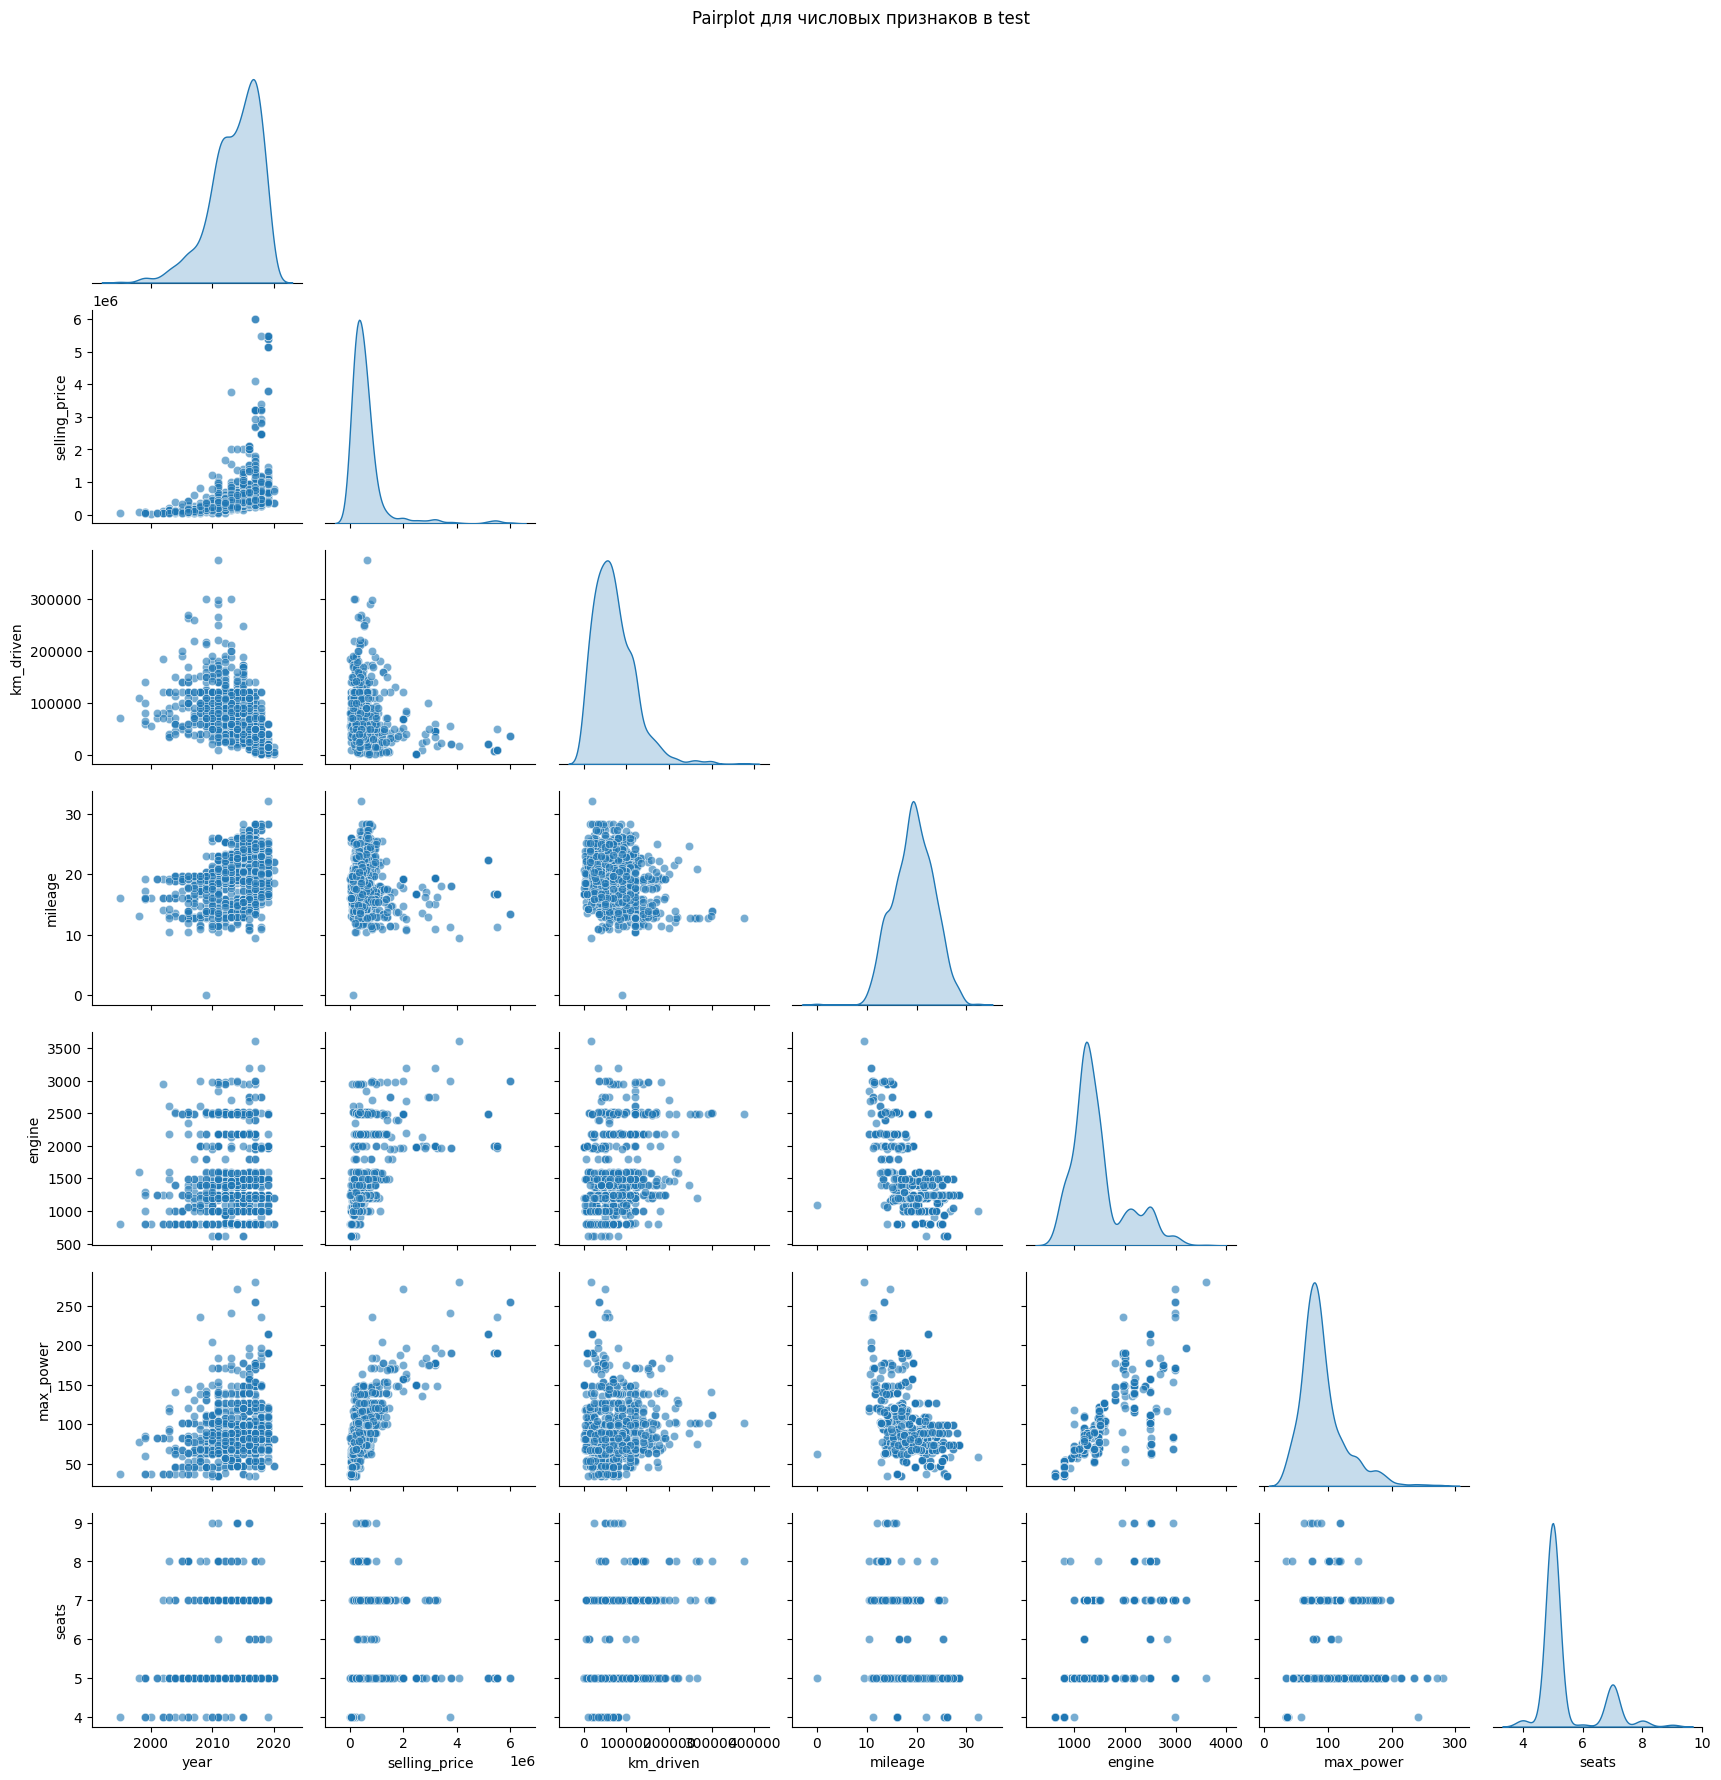

4) Ответ на вопрос о сходстве распределений:
- Совокупности train и test выглядят похожими. Однако, можно заметить различия в распределении некоторых признаков.
- Например, распределение признака 'selling_price' доступно только в train и отсутствует в test.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Шаг 1. Построение pairplot для числовых признаков в df_train
print("1) Визуализация попарных распределений числовых признаков для train:")
numeric_features = df_train.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(12, 8))
sns.pairplot(df_train[numeric_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot для числовых признаков в train", y=1.02)
plt.show()

# Вопросы по train:
print("2) Ответы на вопросы по train:")
print("- Можно предположить связь некоторых признаков с целевой переменной 'selling_price'. Например:")
print("  * Распределение цены ('selling_price') может зависеть от мощности ('max_power') или пробега ('mileage').")
print("  * Видны слабые линейные связи для некоторых признаков.")
print("- На основе распределений можно предположить наличие корреляции между такими признаками, как:")
print("  * 'engine' и 'max_power' — возможная прямая корреляция.")
print("  * 'mileage' и другими признаками — более слабая взаимосвязь.")

print()

# Шаг 2. Построение pairplot для числовых признаков в df_test
print("3) Визуализация попарных распределений числовых признаков для test:")
plt.figure(figsize=(12, 8))
sns.pairplot(df_test[numeric_features], diag_kind='kde', corner=True, plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot для числовых признаков в test", y=1.02)
plt.show()

# Вопросы по сравнению train и test:
print("4) Ответ на вопрос о сходстве распределений:")
print("- Совокупности train и test выглядят похожими. Однако, можно заметить различия в распределении некоторых признаков.")
print("- Например, распределение признака 'selling_price' доступно только в train и отсутствует в test.")

`Your answer here`

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


Коэффициенты корреляции Пирсона для числовых признаков тренировочного набора:


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156648,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692754,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024630,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373271,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681082,0.652172
max_power,0.156648,0.692754,0.024630,-0.373271,0.681082,1.000000,0.244060
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244060,1.000000


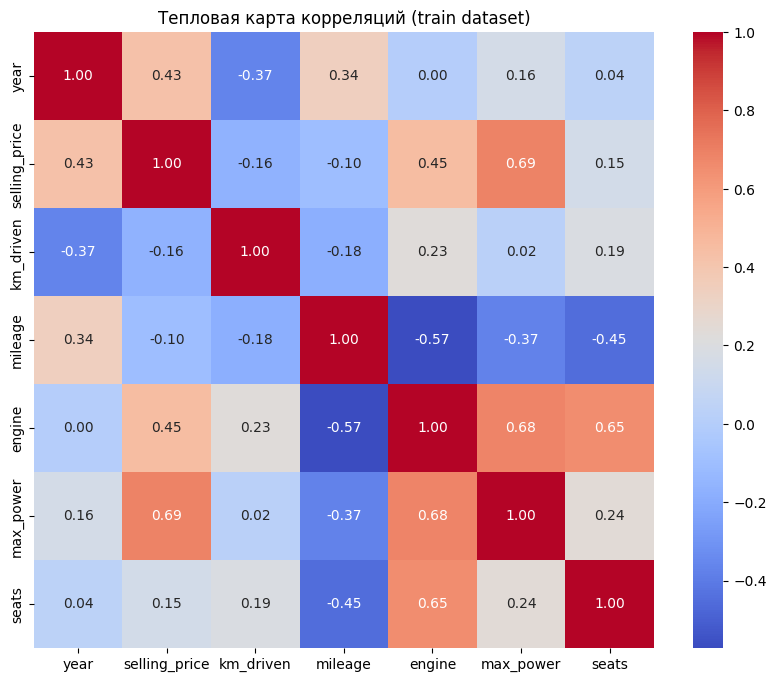

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Выделение числовых признаков
numerical_features = df_train.select_dtypes(include=[np.number])

# 2. Расчет коэффициентов корреляции Пирсона
correlation_matrix = numerical_features.corr()
print("Коэффициенты корреляции Пирсона для числовых признаков тренировочного набора:")
display(correlation_matrix)

# 3. Построение тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Тепловая карта корреляций (train dataset)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1) Наименьшая кор-ция: engine mileage и seats mileage
2) Наибольшая кор-ция: selling price max power и max power engine
3) Верно, так как кор-ция между показателями составляет 34%.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

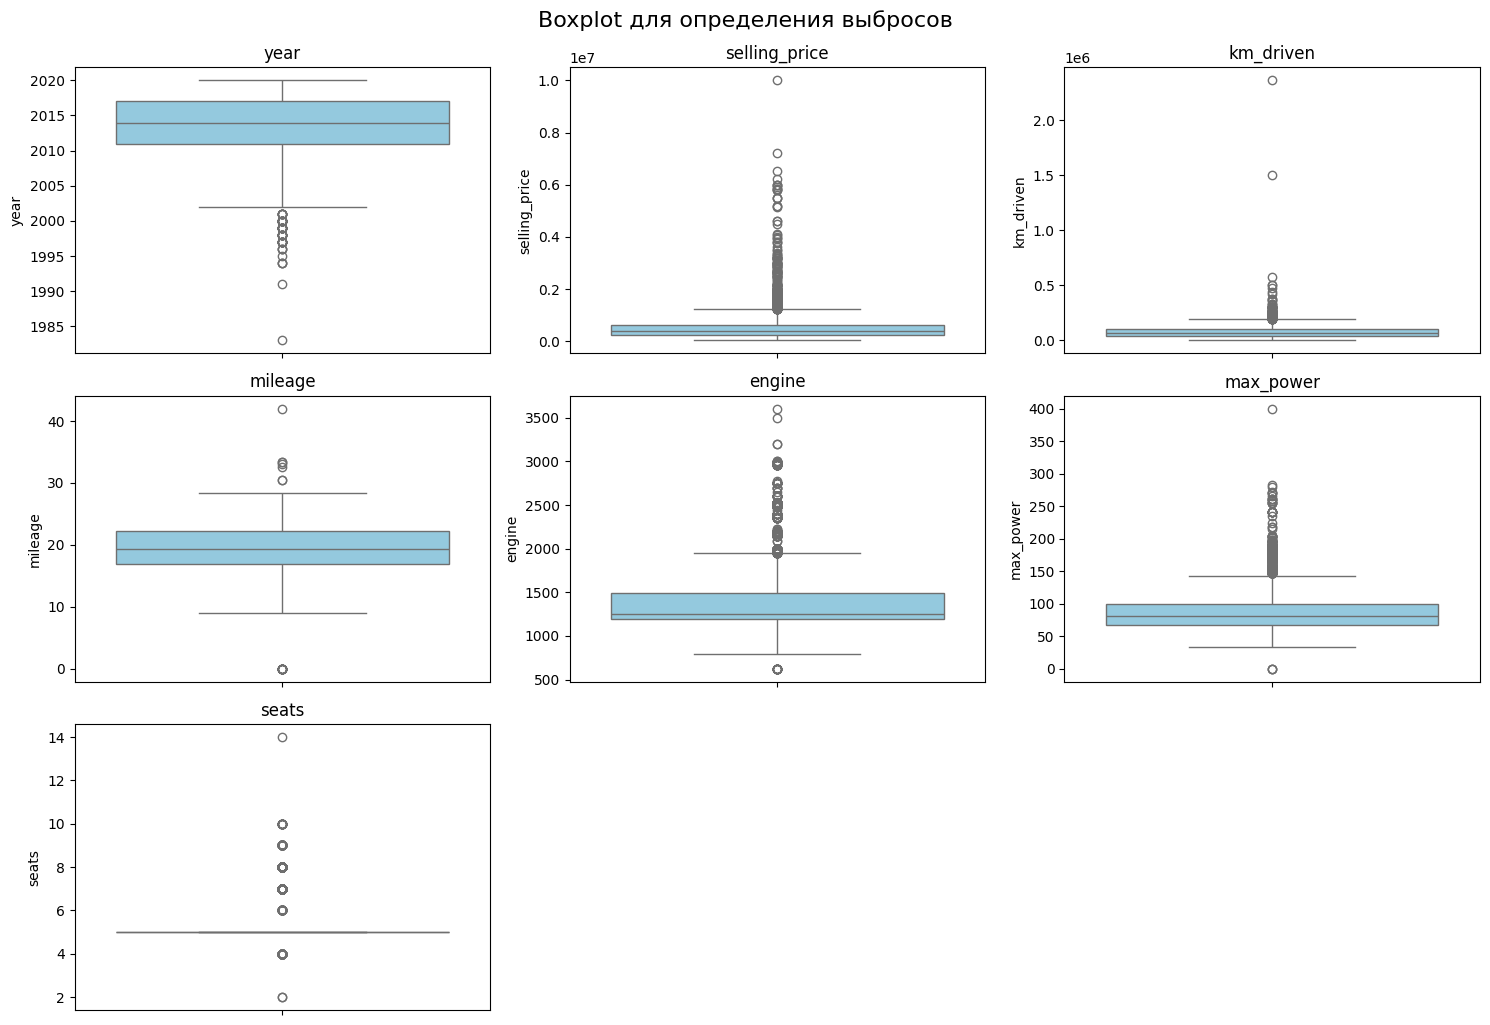

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Выделяем числовые признаки из тренировочного набора
numerical_features = df_train.select_dtypes(include=[np.number])

# 2. Построение boxplot для каждого числового признака
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot((len(numerical_features.columns) + 2) // 3, 3, i)
    sns.boxplot(y=df_train[column], color='skyblue')
    plt.title(column)
    plt.tight_layout()

plt.suptitle("Boxplot для определения выбросов", fontsize=16, y=1.02)
plt.show()

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [16]:
from sklearn.model_selection import train_test_split

# 1. Создаем копии данных для работы только с вещественными признаками
train_numeric = df_train.select_dtypes(include=[np.number]).copy()
test_numeric = df_test.select_dtypes(include=[np.number]).copy()

# Убедимся, что целевая переменная 'selling_price' присутствует
target_column = 'selling_price'

# 2. Убираем категориальные столбцы (кроме 'seats') из train и test
# 'seats' включаем, так как она числовая, но категориальная по сути
if 'seats' in train_numeric.columns:
    train_numeric = train_numeric.drop(columns=['seats'])

if 'seats' in test_numeric.columns:
    test_numeric = test_numeric.drop(columns=['seats'])

# 3. Разделение данных на признаки (X) и целевую переменную (y)
X_train, X_test = train_numeric.drop(columns=[target_column]), test_numeric.drop(columns=[target_column])
y_train, y_test = train_numeric[target_column], test_numeric[target_column]

# 4. Проверка размеров полученных наборов
print(f"Размер X_train: {X_train.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер X_train: (5840, 5)
Размер y_train: (5840,)
Размер X_test: (1000, 5)
Размер y_test: (1000,)


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Создаем модель линейной регрессии
lr_model = LinearRegression()

# 2. Обучение модели на тренировочных данных
lr_model.fit(X_train, y_train)

# 3. Предсказания для тренировочных и тестовых данных
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# 4. Вычисление метрик
# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 5. Вывод метрик
print("Метрики качества для линейной регрессии:")
print(f"Для тренировочного набора: R^2 = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Для тестового набора:       R^2 = {r2_test:.4f}, MSE = {mse_test:.4f}")

Метрики качества для линейной регрессии:
Для тренировочного набора: R^2 = 0.5914, MSE = 117125315893.2445
Для тестового набора:       R^2 = 0.5911, MSE = 235049122853.2785


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Инициализация стандартизатора
scaler = StandardScaler()

# 2. Стандартизация признаков
# Обучаем стандартизатор на тренировочных данных и преобразуем их
X_train_scaled = scaler.fit_transform(X_train)

# Преобразуем тестовые данные с использованием обученного стандартизатора
X_test_scaled = scaler.transform(X_test)

# 3. Создаем и обучаем модель линейной регрессии
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# 4. Предсказания для тренировочных и тестовых данных
y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

# 5. Вычисление метрик
# MSE
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# 6. Вывод метрик
print("Метрики качества для линейной регрессии после стандартизации:")
print(f"Для тренировочного набора: R^2 = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Для тестового набора:       R^2 = {r2_test:.4f}, MSE = {mse_test:.4f}")

Метрики качества для линейной регрессии после стандартизации:
Для тренировочного набора: R^2 = 0.5914, MSE = 117125315893.2441
Для тестового набора:       R^2 = 0.5911, MSE = 235049122853.2773


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [19]:
# Получаем имена признаков
feature_names = X_train.columns

# Коэффициенты линейной регрессии
coefficients = lr_model.coef_

# Создаем DataFrame для визуализации важности признаков
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Сортируем признаки по абсолютному значению коэффициентов
importance_df["Absolute Coefficient"] = importance_df["Coefficient"].abs()
importance_df = importance_df.sort_values(by="Absolute Coefficient", ascending=False)

# Отображаем результаты
from IPython.display import display
display(importance_df)

# Вывод самого важного признака
most_informative = importance_df.iloc[0]
print(f"Наиболее важный признак: {most_informative['Feature']}, значение коэффициента: {most_informative['Coefficient']:.4f}")

,Feature,Coefficient,Absolute Coefficient
4,max_power,332281.766491,332281.766491
0,year,148438.240844,148438.240844
1,km_driven,-45339.633299,45339.633299
3,engine,42480.899259,42480.899259
2,mileage,33379.379755,33379.379755


Наиболее важный признак: max_power, значение коэффициента: 332281.7665


### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

,Метрика,Трейн,Тест
0,R^2,0.5914,0.5911
1,MSE,117125315899.4494,235049612011.7202


,Признак,Коэффициент
4,max_power,332281.4432
0,year,148438.6388
1,km_driven,-45338.3597
3,engine,42478.4149
2,mileage,33376.9107


,Общее количество признаков,Количество зануленных коэффициентов
0,5,0


,Признак,Коэффициент
4,max_power,332281.4432
0,year,148438.6388
1,km_driven,-45338.3597
3,engine,42478.4149
2,mileage,33376.9107


C:\Users\Admin\AppData\Local\Temp\ipykernel_2180\4010989159.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


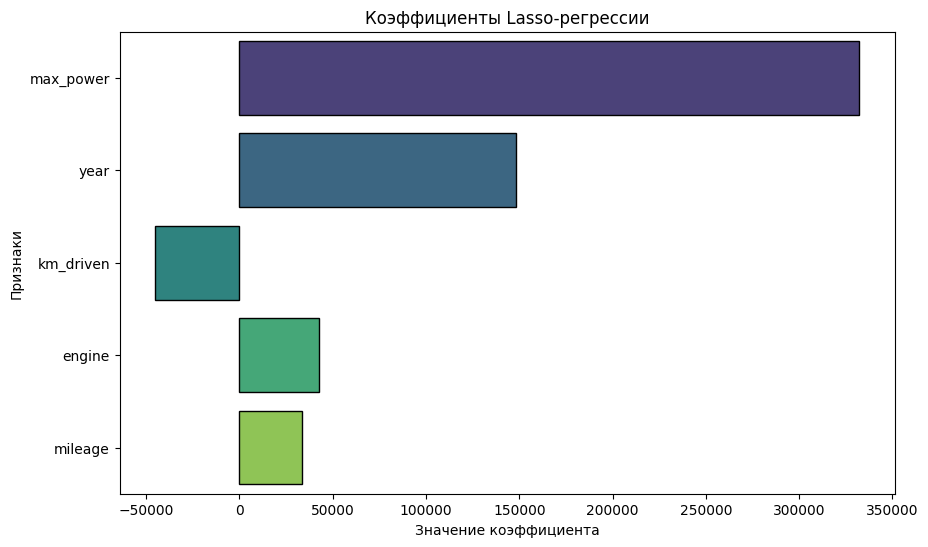

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Обучение Lasso-регрессии с параметрами по умолчанию
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Оценка метрик качества
lasso_r2_train = r2_score(y_train, y_train_pred)
lasso_mse_train = mean_squared_error(y_train, y_train_pred)

lasso_r2_test = r2_score(y_test, y_test_pred)
lasso_mse_test = mean_squared_error(y_test, y_test_pred)

# Таблица метрик качества
metrics_data = {
    "Метрика": ["R^2", "MSE"],
    "Трейн": [lasso_r2_train, lasso_mse_train],
    "Тест": [lasso_r2_test, lasso_mse_test],
}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df.style.set_caption("Метрики качества Lasso-регрессии").format(precision=4))

# 2. Проверка зануления коэффициентов
lasso_coefficients = lasso_model.coef_
num_zero_coefficients = sum(lasso_coefficients == 0)

# Таблица коэффициентов
coefficients_df = pd.DataFrame({
    "Признак": X_train.columns,
    "Коэффициент": lasso_coefficients

}).sort_values(by="Коэффициент", key=abs, ascending=False)
display(coefficients_df.style.set_caption("Коэффициенты Lasso-регрессии").format(precision=4))

# Количество зануленных коэффициентов
zero_coefficients_data = {
    "Общее количество признаков": [len(lasso_coefficients)],
    "Количество зануленных коэффициентов": [num_zero_coefficients]
}

zero_coefficients_df = pd.DataFrame(zero_coefficients_data)
display(zero_coefficients_df.style.set_caption("Анализ зануленных коэффициентов").format(precision=0))

# Важные признаки (не зануленные)
most_important_features = coefficients_df[coefficients_df["Коэффициент"] != 0]
display(most_important_features.style.set_caption("Признаки, оставшиеся важными").format(precision=4))

# Визуализация коэффициентов
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Коэффициент",
    y="Признак",
    data=coefficients_df,
    palette="viridis",
    edgecolor="black"
)

plt.title("Коэффициенты Lasso-регрессии")
plt.xlabel("Значение коэффициента")
plt.ylabel("Признаки")
plt.show()

,Метрика,Трейн,Тест
0,R^2,0.5914,0.5911
1,MSE,117125315899.4494,235049612011.7202


,Признак,Коэффициент
4,max_power,332281.4432
0,year,148438.6388
1,km_driven,-45338.3597
3,engine,42478.4149
2,mileage,33376.9107


,Общее количество признаков,Количество зануленных коэффициентов
0,5,0


,Признак,Коэффициент
4,max_power,332281.4432
0,year,148438.6388
1,km_driven,-45338.3597
3,engine,42478.4149
2,mileage,33376.9107


Признаки, используемые в модели, и их порядок:
1. year
2. km_driven
3. mileage
4. engine
5. max_power


C:\Users\Admin\AppData\Local\Temp\ipykernel_10644\1781701939.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


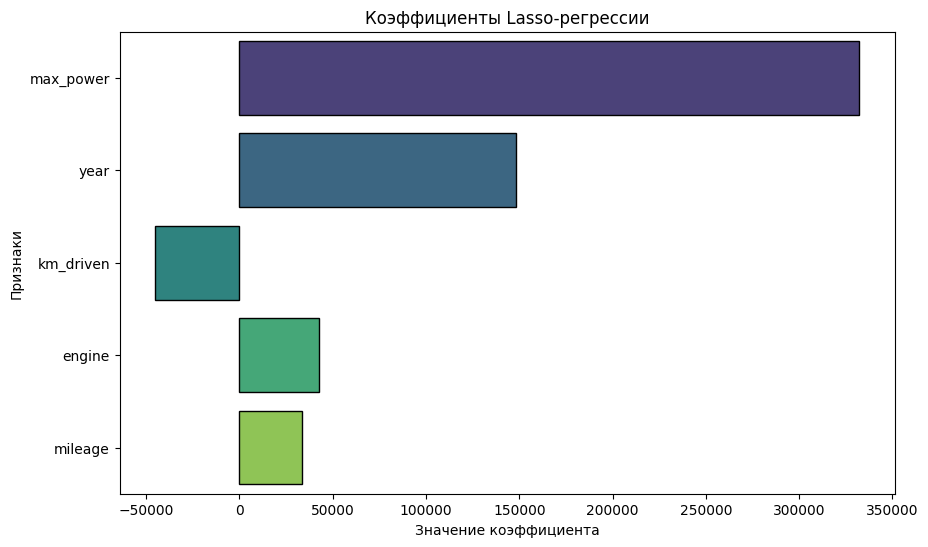

In [22]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Обучение Lasso-регрессии с параметрами по умолчанию
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Предсказания
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Оценка метрик качества
lasso_r2_train = r2_score(y_train, y_train_pred)
lasso_mse_train = mean_squared_error(y_train, y_train_pred)
lasso_r2_test = r2_score(y_test, y_test_pred)
lasso_mse_test = mean_squared_error(y_test, y_test_pred)

# Таблица метрик качества
metrics_data = {
    "Метрика": ["R^2", "MSE"],
    "Трейн": [lasso_r2_train, lasso_mse_train],
    "Тест": [lasso_r2_test, lasso_mse_test],
}

metrics_df = pd.DataFrame(metrics_data)
display(metrics_df.style.set_caption("Метрики качества Lasso-регрессии").format(precision=4))

# 2. Проверка зануления коэффициентов
lasso_coefficients = lasso_model.coef_
num_zero_coefficients = sum(lasso_coefficients == 0)

# Таблица коэффициентов
coefficients_df = pd.DataFrame({
    "Признак": X_train.columns,
    "Коэффициент": lasso_coefficients
}).sort_values(by="Коэффициент", key=abs, ascending=False)

display(coefficients_df.style.set_caption("Коэффициенты Lasso-регрессии").format(precision=4))

# Количество зануленных коэффициентов
zero_coefficients_data = {
    "Общее количество признаков": [len(lasso_coefficients)],
    "Количество зануленных коэффициентов": [num_zero_coefficients]
}

zero_coefficients_df = pd.DataFrame(zero_coefficients_data)
display(zero_coefficients_df.style.set_caption("Анализ зануленных коэффициентов").format(precision=0))

# Важные признаки (не зануленные)
most_important_features = coefficients_df[coefficients_df["Коэффициент"] != 0]
display(most_important_features.style.set_caption("Признаки, оставшиеся важными").format(precision=4))

# Добавляем вывод списка признаков модели и их порядок
print("Признаки, используемые в модели, и их порядок:")
for i, feature in enumerate(X_train.columns):
    print(f"{i + 1}. {feature}")

# Визуализация коэффициентов
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Коэффициент",
    y="Признак",
    data=coefficients_df,
    palette="viridis",
    edgecolor="black"
)

plt.title("Коэффициенты Lasso-регрессии")
plt.xlabel("Значение коэффициента")
plt.ylabel("Признаки")
plt.show()

## Создание и сохранение  pickle файла для сервиса

In [23]:
import pickle

# Сохраняем модель, скейлеры и данные в словарь
model_data = {
    "model": lasso_model,
    "scaler": X_train_scaled,
    "metrics": metrics_data,
    "coefficients": lasso_coefficients,
    "important_features": most_important_features
}

# Сохраняем данные в .pickle файл
with open("lasso_model_data.pickle", "wb") as file:
    pickle.dump(model_data, file)

print("Модель и данные сохранены в lasso_model_data.pickle")

Модель и данные сохранены в lasso_model_data.pickle


In [24]:
import pickle
from sklearn.linear_model import Lasso

# модель была обучена на данных X_train_scaled и y_train
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Сохранение модели в файл
with open("lasso_model.pkl", "wb") as f:
    pickle.dump(lasso_model, f)

In [25]:
import pickle

# Загрузка модели
with open("lasso_model.pkl", "rb") as f:
    model = pickle.load(f)

# Проверка типа объекта
print(type(model))  # Должно вывести <class 'sklearn.linear_model._coordinate_descent.Lasso'>

<class 'sklearn.linear_model._coordinate_descent.Lasso'>


In [26]:
import pandas as pd

# Пример данных

input_data = pd.DataFrame([{
    "year": 2017,
    "km_driven": 10000,
    "mileage": 20.14,
    "engine": 4000,
    "max_power": 400

}])

# Предсказание

prediction = model.predict(input_data)
print(prediction)

[1.50038546e+08]


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


## Итоговый код для сервиса (этот код был использован для прогнозирования)

In [ ]:
import pickle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Предполагается, что X_train, X_test, y_train, y_test уже определены

# 1. Инициализация стандартизатора
scaler = StandardScaler()

# 2. Стандартизация данных
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Обучение Lasso-регрессии
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# 4. Сохранение модели, скейлера и списка признаков в pickle-файл
model_data = {
    "model": lasso_model,
    "scaler": scaler,
    "features": list(X_train.columns),  # Список признаков
}

with open("lasso_model_with_scaler.pkl", "wb") as f:
    pickle.dump(model_data, f)

print("Модель, скейлер и признаки сохранены в 'lasso_model_with_scaler.pkl'")

Модель, скейлер и признаки сохранены в 'lasso_model_with_scaler.pkl'


## Создание CSV (был использован для прогнозирования)

In [22]:
import pandas as pd

# Данные для файла
data = {
    "year": [2018, 2017, 2017, 2020, 2018],
    "km_driven": [100000, 120000, 90000, 11000, 80000],
    "mileage": [20.5, 10.0, 21.0, 24.0, 19.5],
    "engine": [3700, 1200, 1700, 2500, 3000],
    "max_power": [100, 200, 150, 90, 220],
}

# Создаем DataFrame
df = pd.DataFrame(data)

# Сохраняем в CSV
df.to_csv("input_data.csv", index=False)

print("Файл 'input_data.csv' успешно создан!")

Файл 'input_data.csv' успешно создан!


### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Обучено моделей: 200


C:\Users\Admin\AppData\Local\Temp\ipykernel_6708\88671543.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_results_display.rename(columns={


,Лучший коэффициент регуляризации (alpha),Лучший R^2 на кросс-валидации,Количество зануленных коэффициентов
0,1000.0000,0.5677,0


,Alpha,Mean R^2,Std R^2
19,1000.0000,0.5677,0.0671
18,483.2930,0.5672,0.0680
17,233.5721,0.5670,0.0684
16,112.8838,0.5669,0.0686
15,54.5559,0.5669,0.0687
14,26.3665,0.5668,0.0688
13,12.7427,0.5668,0.0688
12,6.1585,0.5668,0.0688
11,2.9764,0.5668,0.0688
10,1.4384,0.5668,0.0688


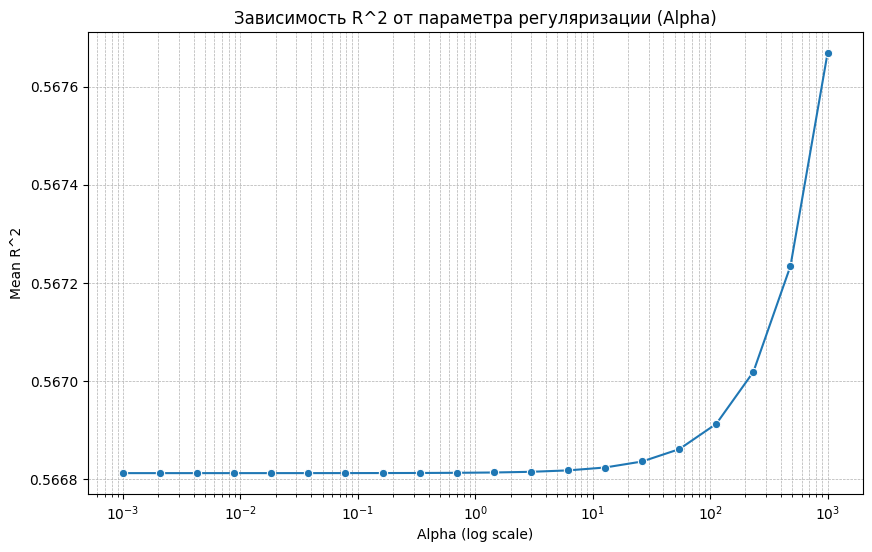

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt

# Определение сетки гиперпараметров для Lasso-регрессии
param_grid = {
    "alpha": np.logspace(-3, 3, 20),  # Коэффициент регуляризации
}

# Инициализация модели Lasso
lasso_model = Lasso(random_state=42, max_iter=10000)

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso_model,
    param_grid=param_grid,
    scoring="r2",  # Оптимизируем R^2
    cv=10,  # 10 фолдов
    n_jobs=-1,  # Используем все процессоры
    verbose=1  # Для отслеживания процесса
)

# Запуск GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Результаты поиска
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Количество моделей, обученных грид-сёрчем
total_models = len(param_grid["alpha"]) * 10  # Кол-во значений параметра * кол-во фолдов

# Таблица с результатами грид-сёрча
grid_results = pd.DataFrame(grid_search.cv_results_).sort_values(by="mean_test_score", ascending=False)
grid_results_display = grid_results[["param_alpha", "mean_test_score", "std_test_score"]]
grid_results_display.rename(columns={
    "param_alpha": "Alpha",
    "mean_test_score": "Mean R^2",
    "std_test_score": "Std R^2"
}, inplace=True)

# Проверка зануления коэффициентов для лучшей модели
best_model_coefficients = best_model.coef_
num_zero_coefficients = sum(best_model_coefficients == 0)

# Вывод результатов в красивые таблицы
print(f"Обучено моделей: {total_models}")
display(pd.DataFrame({
    "Лучший коэффициент регуляризации (alpha)": [best_params['alpha']],
    "Лучший R^2 на кросс-валидации": [best_score],
    "Количество зануленных коэффициентов": [num_zero_coefficients]
}).style.set_caption("Результаты оптимизации").format(precision=4))

# Таблица со всеми результатами грид-сёрча
display(grid_results_display.style.set_caption("Результаты грид-сёрча").background_gradient(cmap="Blues").format(precision=4))

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Alpha", 
    y="Mean R^2", 
    data=grid_results_display.sort_values(by="Alpha"), 
    marker="o"
)

plt.xscale("log")
plt.title("Зависимость R^2 от параметра регуляризации (Alpha)")
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean R^2")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Обучено моделей: 1000


C:\Users\Admin\AppData\Local\Temp\ipykernel_6708\50231740.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_results_elastic_display.rename(columns={


,Лучший коэффициент регуляризации (alpha),Лучшее значение l1_ratio,Лучший R^2 на кросс-валидации
0,0.4642,0.7000,0.5751


,Alpha,L1 Ratio,Mean R^2,Std R^2
46,0.4642,0.7000,0.5751,0.0604
45,0.4642,0.6000,0.5746,0.0596
47,0.4642,0.8000,0.5744,0.0620
30,0.1000,0.1000,0.5743,0.0621
31,0.1000,0.2000,0.5739,0.0626
58,2.1544,0.9000,0.5738,0.0595
32,0.1000,0.3000,0.5734,0.0631
44,0.4642,0.5000,0.5731,0.0595
33,0.1000,0.4000,0.5729,0.0637
34,0.1000,0.5000,0.5722,0.0644


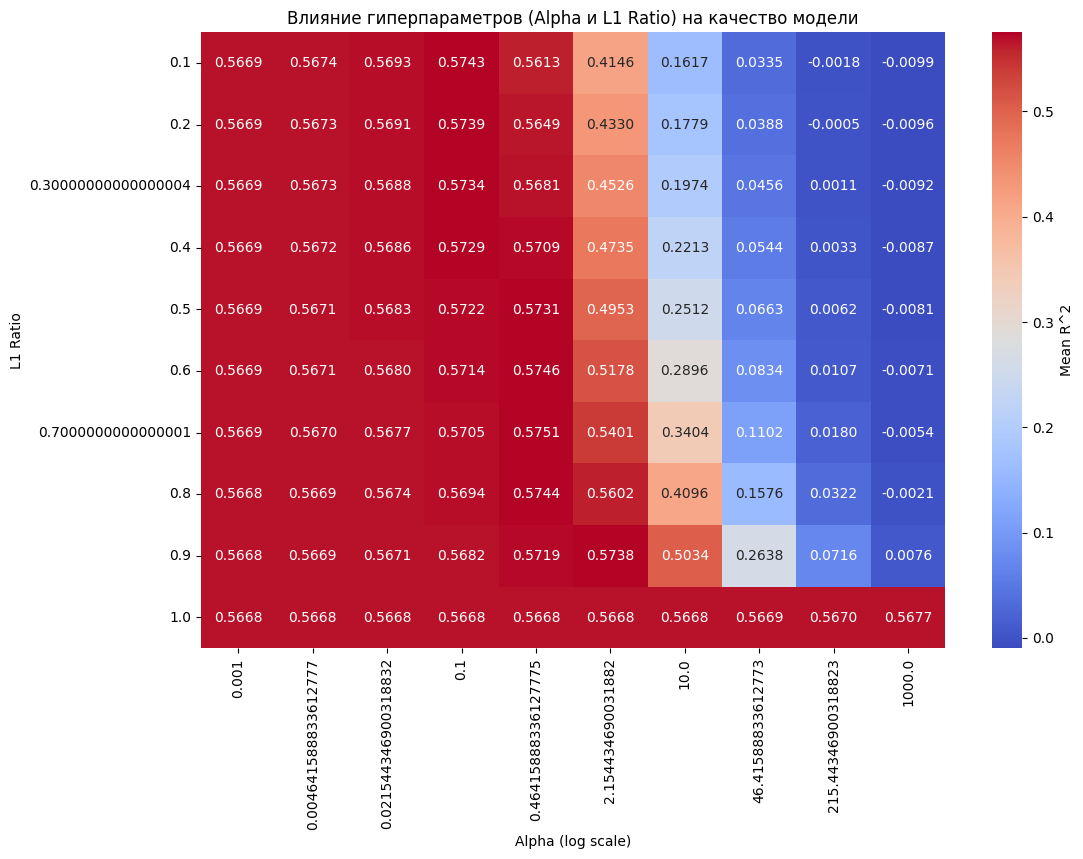

In [23]:
from sklearn.linear_model import ElasticNet

# Определение сетки гиперпараметров для ElasticNet
param_grid_elastic = {
    "alpha": np.logspace(-3, 3, 10),  # Коэффициент регуляризации
    "l1_ratio": np.linspace(0.1, 1.0, 10),  # Доля L1 в регуляризации
}

# Инициализация модели ElasticNet
elastic_model = ElasticNet(random_state=42, max_iter=10000)

# Инициализация GridSearchCV
grid_search_elastic = GridSearchCV(
    estimator=elastic_model,
    param_grid=param_grid_elastic,
    scoring="r2",  # Оптимизируем R^2
    cv=10,  # 10 фолдов
    n_jobs=-1,  # Используем все процессоры
    verbose=1  # Для отслеживания процесса
)

# Запуск GridSearchCV
grid_search_elastic.fit(X_train_scaled, y_train)

# Результаты поиска
best_model_elastic = grid_search_elastic.best_estimator_
best_params_elastic = grid_search_elastic.best_params_
best_score_elastic = grid_search_elastic.best_score_

# Количество моделей, обученных грид-сёрчем
total_models_elastic = len(param_grid_elastic["alpha"]) * len(param_grid_elastic["l1_ratio"]) * 10

# Таблица с результатами грид-сёрча
grid_results_elastic = pd.DataFrame(grid_search_elastic.cv_results_).sort_values(by="mean_test_score", ascending=False)
grid_results_elastic_display = grid_results_elastic[
    ["param_alpha", "param_l1_ratio", "mean_test_score", "std_test_score"]
]

grid_results_elastic_display.rename(columns={
    "param_alpha": "Alpha",
    "param_l1_ratio": "L1 Ratio",
    "mean_test_score": "Mean R^2",
    "std_test_score": "Std R^2"
}, inplace=True)

# Вывод результатов в таблицы
print(f"Обучено моделей: {total_models_elastic}")
display(pd.DataFrame({
    "Лучший коэффициент регуляризации (alpha)": [best_params_elastic["alpha"]],
    "Лучшее значение l1_ratio": [best_params_elastic["l1_ratio"]],
    "Лучший R^2 на кросс-валидации": [best_score_elastic]
}).style.set_caption("Результаты оптимизации ElasticNet").format(precision=4))

# Таблица со всеми результатами грид-сёрча для ElasticNet
display(grid_results_elastic_display.style.set_caption("Результаты грид-сёрча ElasticNet")
        .background_gradient(cmap="Blues").format(precision=4))

# Визуализация влияния гиперпараметров
plt.figure(figsize=(12, 8))

# Построение сводной таблицы для тепловой карты
pivot_table = grid_results_elastic_display.pivot(
    index="L1 Ratio", 
    columns="Alpha", 
    values="Mean R^2"
)

# Построение тепловой карты
sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="coolwarm", cbar_kws={'label': 'Mean R^2'})
plt.title("Влияние гиперпараметров (Alpha и L1 Ratio) на качество модели")
plt.xlabel("Alpha (log scale)")
plt.ylabel("L1 Ratio")
plt.show()

# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


### **Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [ ]:
'''
# Удаление столбца name
df_train_dropped = df_train.drop(columns=["name"])
df_test_dropped = df_test.drop(columns=["name"])

print("Столбец 'name' успешно удален.")
display(df_train_dropped.head())
'''

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

### **Бонус 0.5 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления

In [24]:
# Оставляем только марки машин

df_train["brand"] = df_train["name"].str.split(" ").str[0]
df_test["brand"] = df_test["name"].str.split(" ").str[0]

# Удаляем оригинальный столбец `name`
df_train = df_train.drop(columns=["name"])
df_test = df_test.drop(columns=["name"])

print("Столбец 'name' успешно обработан. Добавлен новый столбец 'brand'.")
display(df_train[["brand"]].head())
display(df_test[["brand"]].head())

Столбец 'name' успешно обработан. Добавлен новый столбец 'brand'.


,brand
0,Maruti
1,Skoda
2,Hyundai
3,Maruti
4,Hyundai


,brand
0,Mahindra
1,Tata
2,Honda
3,Honda
4,Tata


### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tabulate import tabulate

# Список категориальных признаков
categorical_features = [col for col in df_train.columns if 'fuel' in col or 
                        'seller_type' in col or 'transmission' in col or 
                        'owner' in col or 'seats' in col] + ['brand']

# Целевая переменная
target = 'selling_price'

# Проверка наличия целевой переменной в данных
if target not in df_train.columns or target not in df_test.columns:
    raise KeyError(f"Целевая переменная '{target}' отсутствует в данных.")

# Разделение данных на признаки (X) и целевую переменную (y)
X_train = df_train[categorical_features]
y_train = df_train[target]
X_test = df_test[categorical_features]
y_test = df_test[target]

# Проверка на отсутствие пропущенных значений
if X_train.isnull().sum().any() or X_test.isnull().sum().any():
    raise ValueError("Обнаружены пропущенные значения в данных. Проверьте ваши данные.")

# Создание преобразователя для категориальных признаков
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Создание конвейера обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Создание и обучение модели с использованием конвейера
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Обучение модели
model.fit(X_train, y_train)

# Предсказания
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Создание таблицы метрик
train_metrics = {
    "Метрика": ["MSE", "R²"],
    "Тренировочный набор": [mse_train, r2_train],
    "Тестовый набор": [mse_test, r2_test]
}

# Количество категориальных признаков и их названия
categorical_info = {
    "Количество признаков": [len(categorical_features)],
    "Названия признаков": [", ".join(categorical_features)]
}

# Вывод метрик
print("\nРезультаты предсказаний и оценки модели:")
print(tabulate(train_metrics, headers='keys', tablefmt='fancy_grid'))

# Вывод информации о категориальных признаках
print("\nИнформация о категориальных признаках:")
print(tabulate(categorical_info, headers='keys', tablefmt='fancy_grid'))


Результаты предсказаний и оценки модели:
╒═══════════╤═══════════════════════╤══════════════════╕
│ Метрика   │   Тренировочный набор │   Тестовый набор │
╞═══════════╪═══════════════════════╪══════════════════╡
│ MSE       │           1.06007e+11 │      1.72208e+11 │
├───────────┼───────────────────────┼──────────────────┤
│ R²        │           0.63017     │      0.700418    │
╘═══════════╧═══════════════════════╧══════════════════╛

Информация о категориальных признаках:
╒════════════════════════╤══════════════════════════════════════════════════════╕
│   Количество признаков │ Названия признаков                                   │
╞════════════════════════╪══════════════════════════════════════════════════════╡
│                      6 │ fuel, seller_type, transmission, owner, seats, brand │
╘════════════════════════╧══════════════════════════════════════════════════════╛


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

## Вещественные признаки + категориальный признак "brand" преобразованный через метод OneHot.

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from tabulate import tabulate
import numpy as np

# Список вещественных признаков
numerical_features = [col for col in df_train.columns if df_train[col].dtype in ['float64', 'int64'] and col not in ['selling_price']]

# Целевая переменная
target = 'selling_price'

# Проверка наличия целевой переменной в данных
if target not in df_train.columns or target not in df_test.columns:
    raise KeyError(f"Целевая переменная '{target}' отсутствует в данных.")

# Разделение данных на признаки (X) и целевую переменную (y)
categorical_features = ['brand']  # Категориальный признак
X_train = df_train[numerical_features + categorical_features]
y_train = df_train[target]
X_test = df_test[numerical_features + categorical_features]
y_test = df_test[target]

# Проверка на отсутствие пропущенных значений
if X_train.isnull().sum().any() or X_test.isnull().sum().any():
    raise ValueError("Обнаружены пропущенные значения в данных. Проверьте ваши данные.")

# Создание трансформеров для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Стандартизация числовых данных
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Кодирование категориальных данных
    ]
)

# Создание модели Ridge с пайплайном
ridge_pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),  # Предобработка данных
        ('ridge', Ridge())  # Модель Ridge
    ]
)

# Определение параметров для поиска
param_grid = {'ridge__alpha': np.logspace(-3, 3, 7)}  # alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Настройка GridSearchCV
ridge_cv = GridSearchCV(
    estimator=ridge_pipeline,
    param_grid=param_grid,
    scoring='r2',  # Использование R² как метрики
    cv=10,         # Кросс-валидация по 10 фолдам
    n_jobs=-1      # Параллельное выполнение
)

# Обучение модели с подбором параметров
ridge_cv.fit(X_train, y_train)

# Лучший параметр alpha
best_alpha = ridge_cv.best_params_['ridge__alpha']

# Обучение модели с оптимальным alpha
ridge_best = ridge_cv.best_estimator_

# Предсказания
y_pred_train = ridge_best.predict(X_train)
y_pred_test = ridge_best.predict(X_test)

# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Создание таблицы метрик
ridge_metrics = {
    "Метрика": ["MSE", "R²"],
    "Тренировочный набор": [mse_train, r2_train],
    "Тестовый набор": [mse_test, r2_test]
}

# Количество признаков и их названия
numerical_info = {
    "Количество вещественных признаков": [len(numerical_features)],
    "Названия вещественных признаков": [", ".join(numerical_features)],
    "Категориальные признаки": [", ".join(categorical_features)]
}

# Вывод метрик
print("\nРезультаты предсказаний и оценки Ridge регрессии:")
print(tabulate(ridge_metrics, headers='keys', tablefmt='fancy_grid'))

# Вывод информации о признаках
print("\nИнформация о признаках:")
print(tabulate(numerical_info, headers='keys', tablefmt='fancy_grid'))

# Вывод оптимального alpha
print(f"\nОптимальное значение alpha: {best_alpha}")


Результаты предсказаний и оценки Ridge регрессии:
╒═══════════╤═══════════════════════╤══════════════════╕
│ Метрика   │   Тренировочный набор │   Тестовый набор │
╞═══════════╪═══════════════════════╪══════════════════╡
│ MSE       │           7.72289e+10 │      1.28135e+11 │
├───────────┼───────────────────────┼──────────────────┤
│ R²        │           0.73057     │      0.777091    │
╘═══════════╧═══════════════════════╧══════════════════╛

Информация о признаках:
╒═════════════════════════════════════╤════════════════════════════════════════════════════╤═══════════════════════════╕
│   Количество вещественных признаков │ Названия вещественных признаков                    │ Категориальные признаки   │
╞═════════════════════════════════════╪════════════════════════════════════════════════════╪═══════════════════════════╡
│                                   6 │ year, km_driven, mileage, engine, max_power, seats │ brand                     │
╘═════════════════════════════════════╧══

## Ниже только вещественные признаки

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tabulate import tabulate
import numpy as np

# Список вещественных признаков
numerical_features = [col for col in df_train.columns if df_train[col].dtype in ['float64', 'int64'] and col != 'selling_price']

# Целевая переменная
target = 'selling_price'

# Проверка наличия целевой переменной в данных
if target not in df_train.columns or target not in df_test.columns:
    raise KeyError(f"Целевая переменная '{target}' отсутствует в данных.")

# Разделение данных на признаки (X) и целевую переменную (y)
X_train = df_train[numerical_features]
y_train = df_train[target]
X_test = df_test[numerical_features]
y_test = df_test[target]

# Проверка на отсутствие пропущенных значений
if X_train.isnull().sum().any() or X_test.isnull().sum().any():
    raise ValueError("Обнаружены пропущенные значения в данных. Проверьте ваши данные.")

# Создание модели Ridge
ridge = Ridge()

# Определение параметров для поиска
param_grid = {'alpha': np.logspace(-3, 3, 7)}  # alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Настройка GridSearchCV
ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',  # Использование R² как метрики
    cv=10,         # Кросс-валидация по 10 фолдам
    n_jobs=-1      # Параллельное выполнение
)

# Обучение модели с подбором параметров
ridge_cv.fit(X_train, y_train)

# Лучший параметр alpha
best_alpha = ridge_cv.best_params_['alpha']

# Обучение модели с оптимальным alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Предсказания
y_pred_train = ridge_best.predict(X_train)
y_pred_test = ridge_best.predict(X_test)

# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Создание таблицы метрик
ridge_metrics = {
    "Метрика": ["MSE", "R²"],
    "Тренировочный набор": [mse_train, r2_train],
    "Тестовый набор": [mse_test, r2_test]
}

# Количество вещественных признаков и их названия
numerical_info = {
    "Количество признаков": [len(numerical_features)],
    "Названия признаков": [", ".join(numerical_features)]
}

# Вывод метрик
print("\nРезультаты предсказаний и оценки Ridge регрессии:")
print(tabulate(ridge_metrics, headers='keys', tablefmt='fancy_grid'))

# Вывод информации о вещественных признаках
print("\nИнформация о вещественных признаках:")
print(tabulate(numerical_info, headers='keys', tablefmt='fancy_grid'))

# Вывод оптимального alpha
print(f"\nОптимальное значение alpha: {best_alpha}")


Результаты предсказаний и оценки Ridge регрессии:
╒═══════════╤═══════════════════════╤══════════════════╕
│ Метрика   │   Тренировочный набор │   Тестовый набор │
╞═══════════╪═══════════════════════╪══════════════════╡
│ MSE       │           1.16873e+11 │      2.33298e+11 │
├───────────┼───────────────────────┼──────────────────┤
│ R²        │           0.592263    │      0.594144    │
╘═══════════╧═══════════════════════╧══════════════════╛

Информация о вещественных признаках:
╒════════════════════════╤════════════════════════════════════════════════════╕
│   Количество признаков │ Названия признаков                                 │
╞════════════════════════╪════════════════════════════════════════════════════╡
│                      6 │ year, km_driven, mileage, engine, max_power, seats │
╘════════════════════════╧════════════════════════════════════════════════════╛

Оптимальное значение alpha: 0.001


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

`Your answer here`

In [27]:
import numpy as np

def business_metric(y_true, y_pred):

    """
    Вычисляет долю предсказаний, отличающихся от реальных значений не более чем на 10%.

    Parameters:
    - y_true: array-like, настоящие значения.
    - y_pred: array-like, предсказанные значения.

    Returns:
    - float: доля предсказаний, удовлетворяющих бизнес-условию.
    """

    relative_errors = np.abs(y_true - y_pred) / y_true
    within_10_percent = (relative_errors <= 0.1).mean()

    return within_10_percent

In [30]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# инициализация  моделей 

models = {

    "Lasso": Lasso(alpha=0.1),
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100),
    "Pipeline_Lasso": Pipeline([
        ('scaler', StandardScaler()),  # Масштабирование
        ('lasso', Lasso(alpha=0.1))  # Модель Lasso
    ])
}

# Обучаем пайплайны или модели
for model_name, model in models.items():
    if isinstance(model, Pipeline):
        # Обучение пайплайна на обучающих данных
        model.fit(X_train, y_train)
    else:
        # Обучение моделей без пайплайнов
        if model_name == "Ridge":
            model.fit(X_train[numerical_features], y_train)  # Только числовые признаки
        else:
            model.fit(X_train, y_train)

# Рассчитываем бизнес-метрики
business_metrics = {}
for model_name, model in models.items():
    if isinstance(model, Pipeline):
        # Предсказание с использованием пайплайна
        y_pred_test = model.predict(X_test)
    else:
        # Предсказание для Ridge только с числовыми признаками
        y_pred_test = model.predict(X_test[numerical_features])

    # Вычисляем метрику
    metric_value = business_metric(y_test, y_pred_test)
    business_metrics[model_name] = metric_value

# Определяем лучшую модель
best_model_name = max(business_metrics, key=business_metrics.get)
best_metric_value = business_metrics[best_model_name]

# Вывод результатов
print("Метрика `business_metric` для моделей:")
for model_name, metric_value in business_metrics.items():
    print(f"{model_name}: {metric_value:.4f}")

print(f"\nЛучшая модель для бизнес-цели: {best_model_name} (метрика: {best_metric_value:.4f})")

Метрика `business_metric` для моделей:
Lasso: 0.2270
Ridge: 0.2270
RandomForest: 0.4900
Pipeline_Lasso: 0.2270

Лучшая модель для бизнес-цели: RandomForest (метрика: 0.4900)


# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 18 (3 балла)**


Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 19 (1 балл)**


**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* сохраненный дашборд в любом формате
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией
3. Просматривает ноутбук с DS-частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой!

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/XbnpCTg)

</details>



Ответ: ни преподавателю ни ассистентам не принадлежит